# **Overview** :

This is and end-to-end Machine Learning Project on the Adult Data Set . This data set came form the **UCI Machine Learning Repository** . Our task is to determine wether a person makes over 50K a year. 

We will be using the following steps to as our approach to this project.

1. **Problem Definition** : What problem are we trying to solve ?

2. **Data** : What data do we have?

3. **Evaluation** : What defines a succes ?

4. **Features** : What features do we have? Can we add new features ?

5. **Prepare data for Machine Learning Algorithms**

6. **Modelling** : Which model should you choose? How can you improve it?

7. **Experimenting** : Evaluationg our model beyond accuracy? Have we met our succes critetion? If not, how can we improve our model?

# 1. Problem Definition :
In a statement,
>  Given different attributes our task is to determine whether a person makes over 50K a year or not.


# 2. Data :
> This data comes from UCI Mchine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Adult


* Data contains unknowns in the form `?`


# 3. Evaluation :  
We will be evaluating our model based on accuracy between our test and train sets. We will consider the model a succes if our accuracy is at least 93% between the predicted test set target and the original test set target




# 4. Features
We are given the following features in our data :

* **age** : continuous.


* **workclass**: a factor with levels Federal-gov, Local-gov, Never-worked, Private, Self-emp-inc, Self-emp-not-inc, State-gov, and Without-pay.


* **fnlwgt**: continuous.
   ( This term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. )



* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.


* **education-num**: continuous.



*  **marital-status**:  a factor with levels Adm-clerical, Armed-Forces, Craft-repair, Exec-managerial, Farming-fishing, Handlers-cleaners, Machine-op-inspct, Other-service, Priv-house-serv, Prof-specialty, Protective-serv, Sales, Tech-support, and Transport-moving.


* **occupation**:  Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  
  
* **relationship**:  a factor with levels Husband, Not-in-family, Other-relative, Own-child, Unmarried, and Wife.
  
  
* **race**:  a factor with levels Amer-Indian-Eskimo, Asian-Pac-Islander, Black, Other, and White.
    
    
* **sex**: a factor with levels Female and Male.


* **capital-gain**:  continuous.


* **capital-loss**:  continuous.


* **hours-per-week**:  continuous.


* **native-country**:  
United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


* **target** : 
(>50K), (<=50K) 
(This will be our target variable and we will assume that 0 reprensents <=50K and 1 represent >50K)





In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
import pickle

In [3]:
plt.style.use('seaborn')
pd.set_option('display.max_rows', None, 'display.max_columns', None)
%matplotlib inline

### 4.1 Exploring the data

In [476]:
# Let us read in our data
data = pd.read_csv('adult_data.csv', low_memory=False)
data.head()

,age,workclass,fnlwgt,education,education-num,married-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Check the number of rows and columns in our data set
data.shape

(32561, 15)

In [477]:
data.replace({' ?': np.nan}, inplace=True)

In [7]:
# Check for the different data types in the data
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
married-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

In [9]:
# Check for missing values
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
married-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

In [10]:
# Check percentage of missing values
data.isna().sum() / len(data)

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education-num     0.000000
married-status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.017905
target            0.000000
dtype: float64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   married-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [478]:
# Replace our targets <= 50K and >50K with 1 and 0 respectively
data['target'].replace({' <=50K': 0, ' >50K': 1}, inplace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,married-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


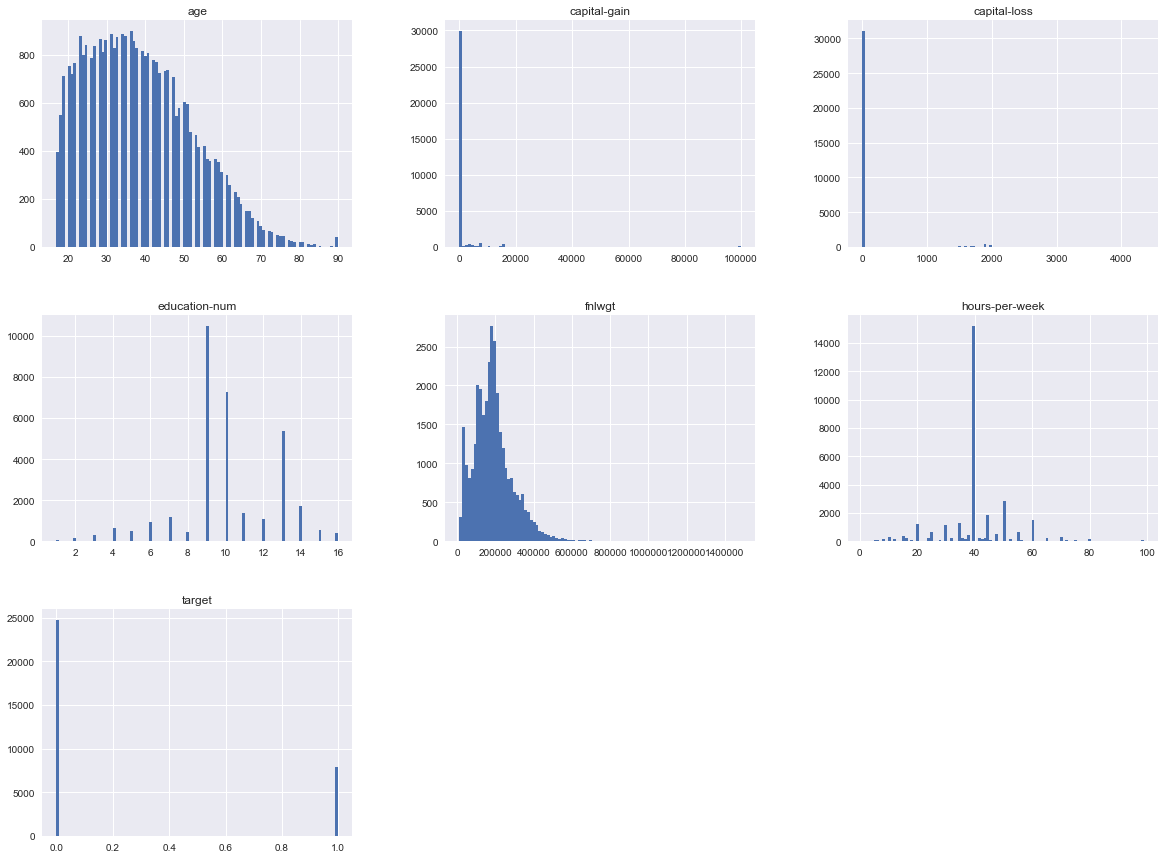

In [14]:
# Let us check the distributions of the features in our data
data.hist(figsize=(20, 15), bins=100);

### 4.2 Exploratory Data Analysis

Let us do some EDA to vilualize our data and gain some insights.

In [308]:
# creating a copy of our test set
adult = data.copy()
adult.dropna(inplace=True)

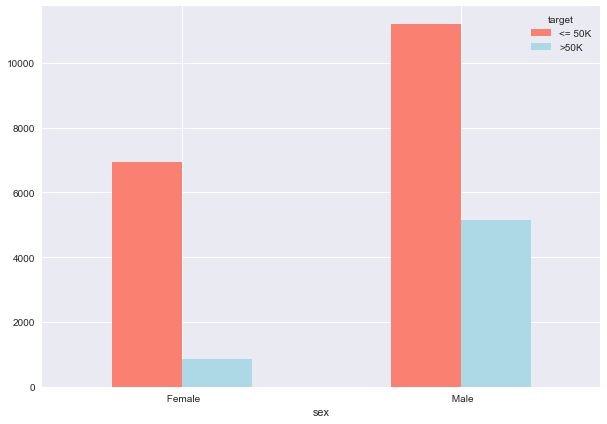

In [19]:
cross0 = pd.crosstab(adult['sex'], adult['target'])
cross0.plot(kind='bar', figsize=(10, 7), color=['salmon', 'lightblue'], rot=0)
plt.legend(('<= 50K', '>50K'), title='target');

>***Both Females and Males both seem to have the same ratio betweeen hitting and missing the mark****

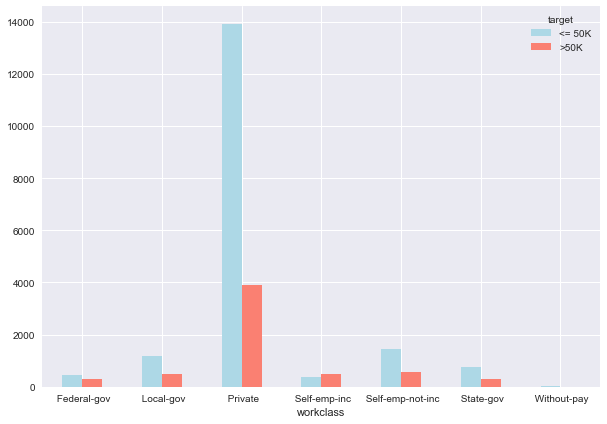

In [20]:
cross1 = pd.crosstab(adult['workclass'], adult['target'])
cross1.plot(kind='bar', figsize=(10, 7), color=['lightblue', 'salmon'], rot=0)
plt.legend(('<= 50K', '>50K'), title='target');

>***People employeed in Self-emp-inc Sector are more likely to achieve our target and People in the Private Workclass are more likely to miss out target***

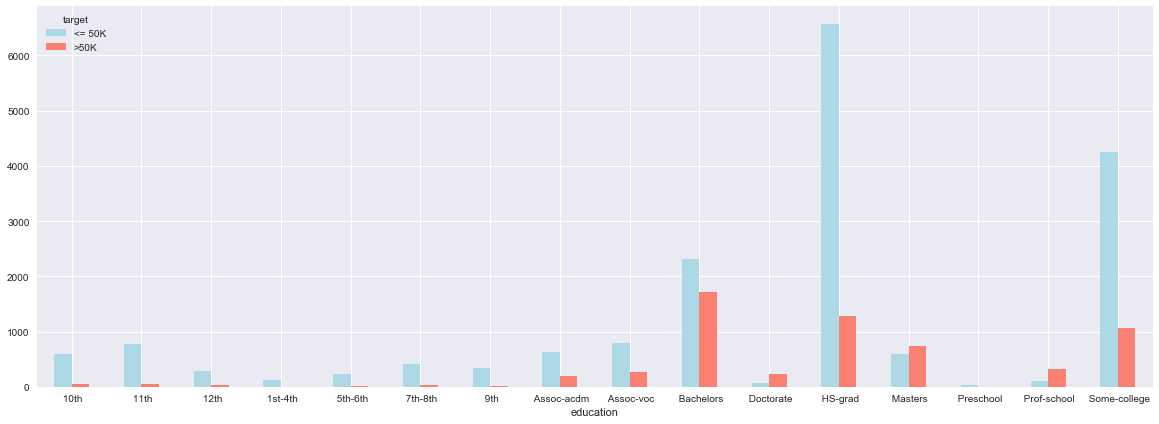

In [21]:
cross2 = pd.crosstab(adult['education'], adult['target'])
cross2.plot(kind='bar', figsize=(20, 7), color=['lightblue', 'salmon'], rot=0);
plt.legend(('<= 50K', '>50K'), title='target', loc='upper left');

>***1st-4th education are more likely to miss our target and Doctorates are more likely to achieve our target***

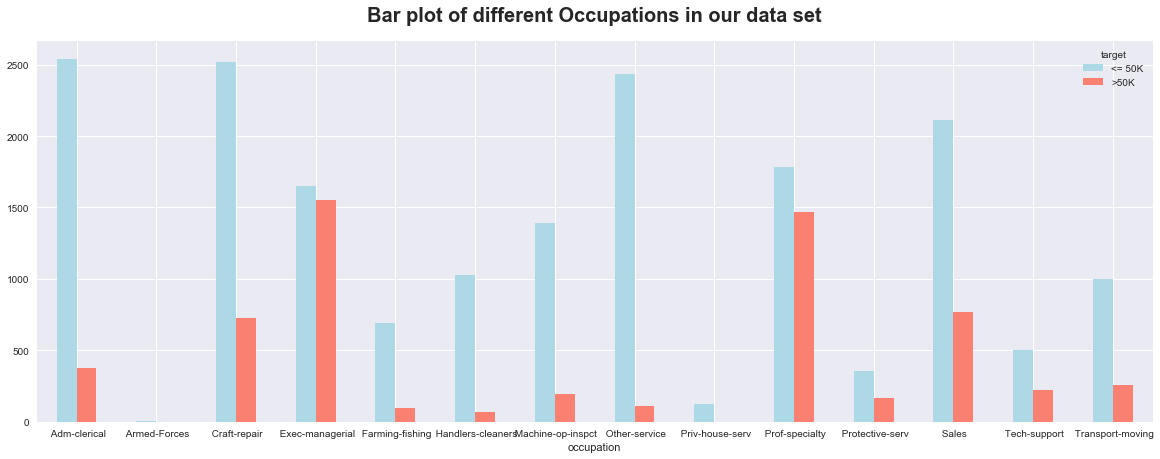

In [22]:
cross2 = pd.crosstab(adult['occupation'], adult['target'])
cross2.plot(kind='bar', figsize=(20, 7), color=['lightblue', 'salmon'], rot=0);
plt.legend(('<= 50K', '>50K'), title='target');
plt.title('Bar plot of different Occupations in our data set', pad=20, fontsize=20, fontweight='bold');

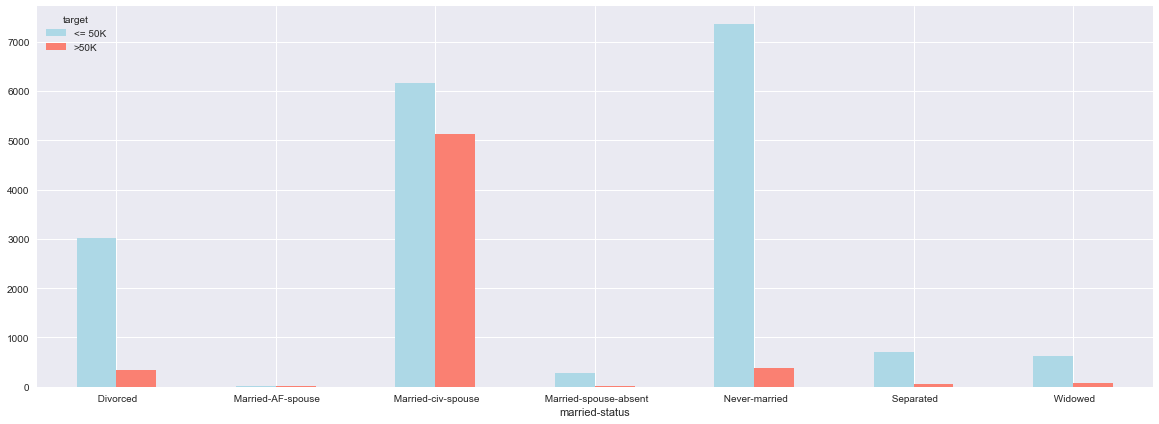

In [23]:
cross4 = pd.crosstab(adult['married-status'], adult['target'])
cross4.plot(kind='bar', figsize=(20, 7), color=['lightblue', 'salmon'], rot=0);
plt.legend(('<= 50K', '>50K'), title='target', loc='upper left');

>***People in Never-Married Category are more likely to miss out target***

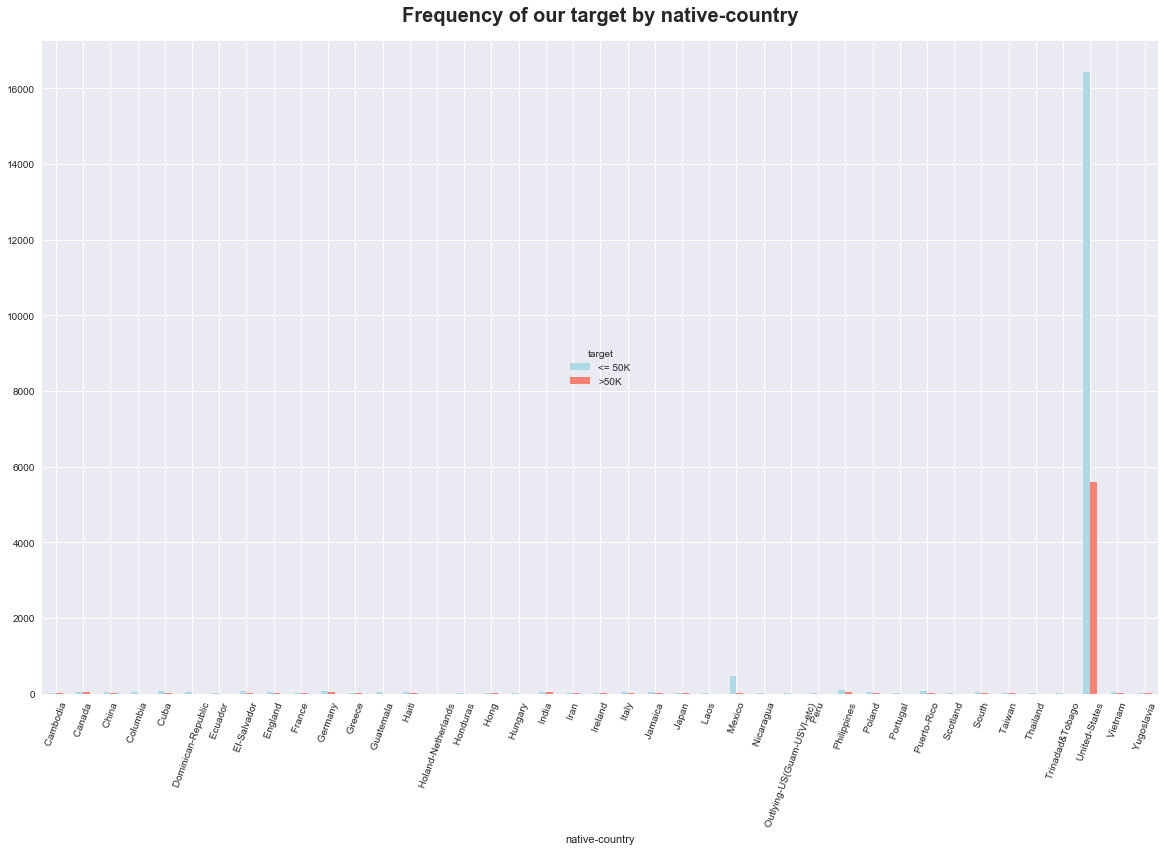

In [24]:
cross5 = pd.crosstab(adult['native-country'], adult['target'])
cross5.plot(kind='bar', figsize=(20, 12), color=['lightblue', 'salmon'], rot=70);
plt.title('Frequency of our target by native-country', fontsize=20, pad=20, fontweight='bold')
plt.legend(('<= 50K', '>50K'), title='target', loc='center');

>***We can merge United-States and Outlying-US(Guam-USVI-etc) into a same USA column, bacuse this action is unlikelt to make any differnce to our data***

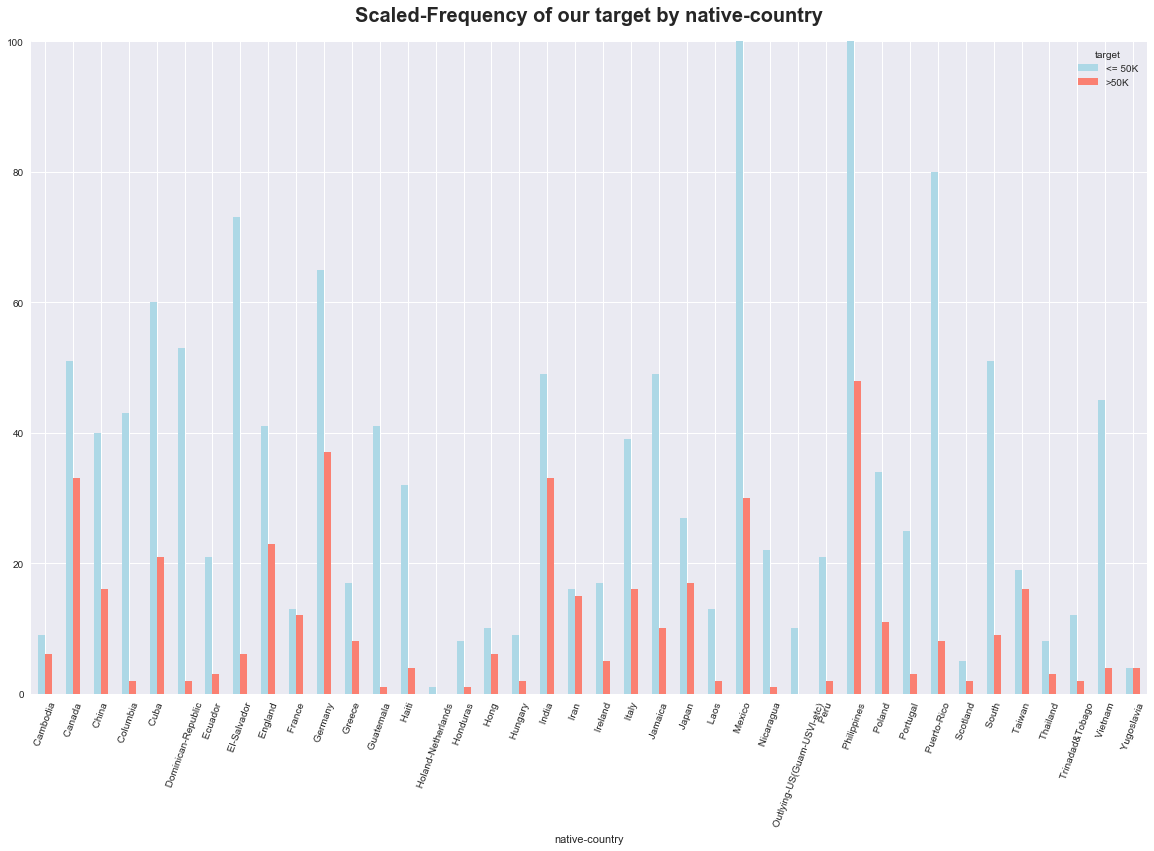

In [25]:
# To get a better intution form the above data we will drop the United-States columns and scale our data for the remaing countries
adult_no_US = adult[adult['native-country'] != ' United-States']
cross5 = pd.crosstab(adult_no_US['native-country'], adult_no_US['target'])
cross5.plot(kind='bar', figsize=(20, 12), color=['lightblue', 'salmon'], rot=70);
plt.ylim(0, 100)
plt.title('Scaled-Frequency of our target by native-country', fontsize=20, pad=20, fontweight='bold');
plt.legend(('<= 50K', '>50K'), title='target');

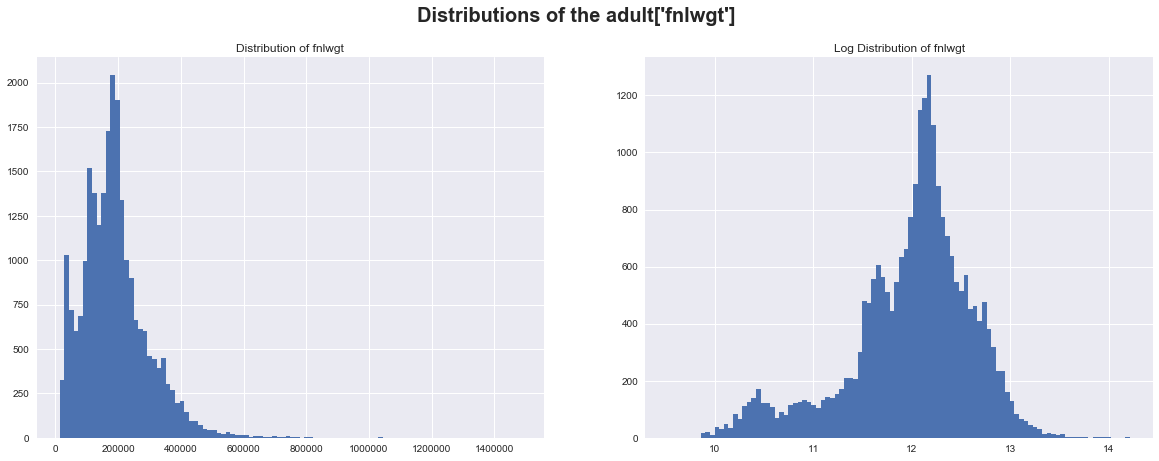

In [26]:
fig, (ax1,ax2) = plt.subplots(figsize=(20, 7), nrows=1, ncols=2);

ax1.hist(adult['fnlwgt'], bins=100)
ax1.set(title='Distribution of fnlwgt')

ax2.hist(np.log(adult['fnlwgt']), bins=100)
ax2.set(title='Log Distribution of fnlwgt')

fig.suptitle("Distributions of the adult['fnlwgt']", fontsize=20, fontweight='bold');

>***It may be better to convert fnlwgt to $log$(fnlwgt)***

/Users/ayushman/opt/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/ayushman/opt/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/ayushman/opt/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/ayushman/opt/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 2000x1700 with 0 Axes>

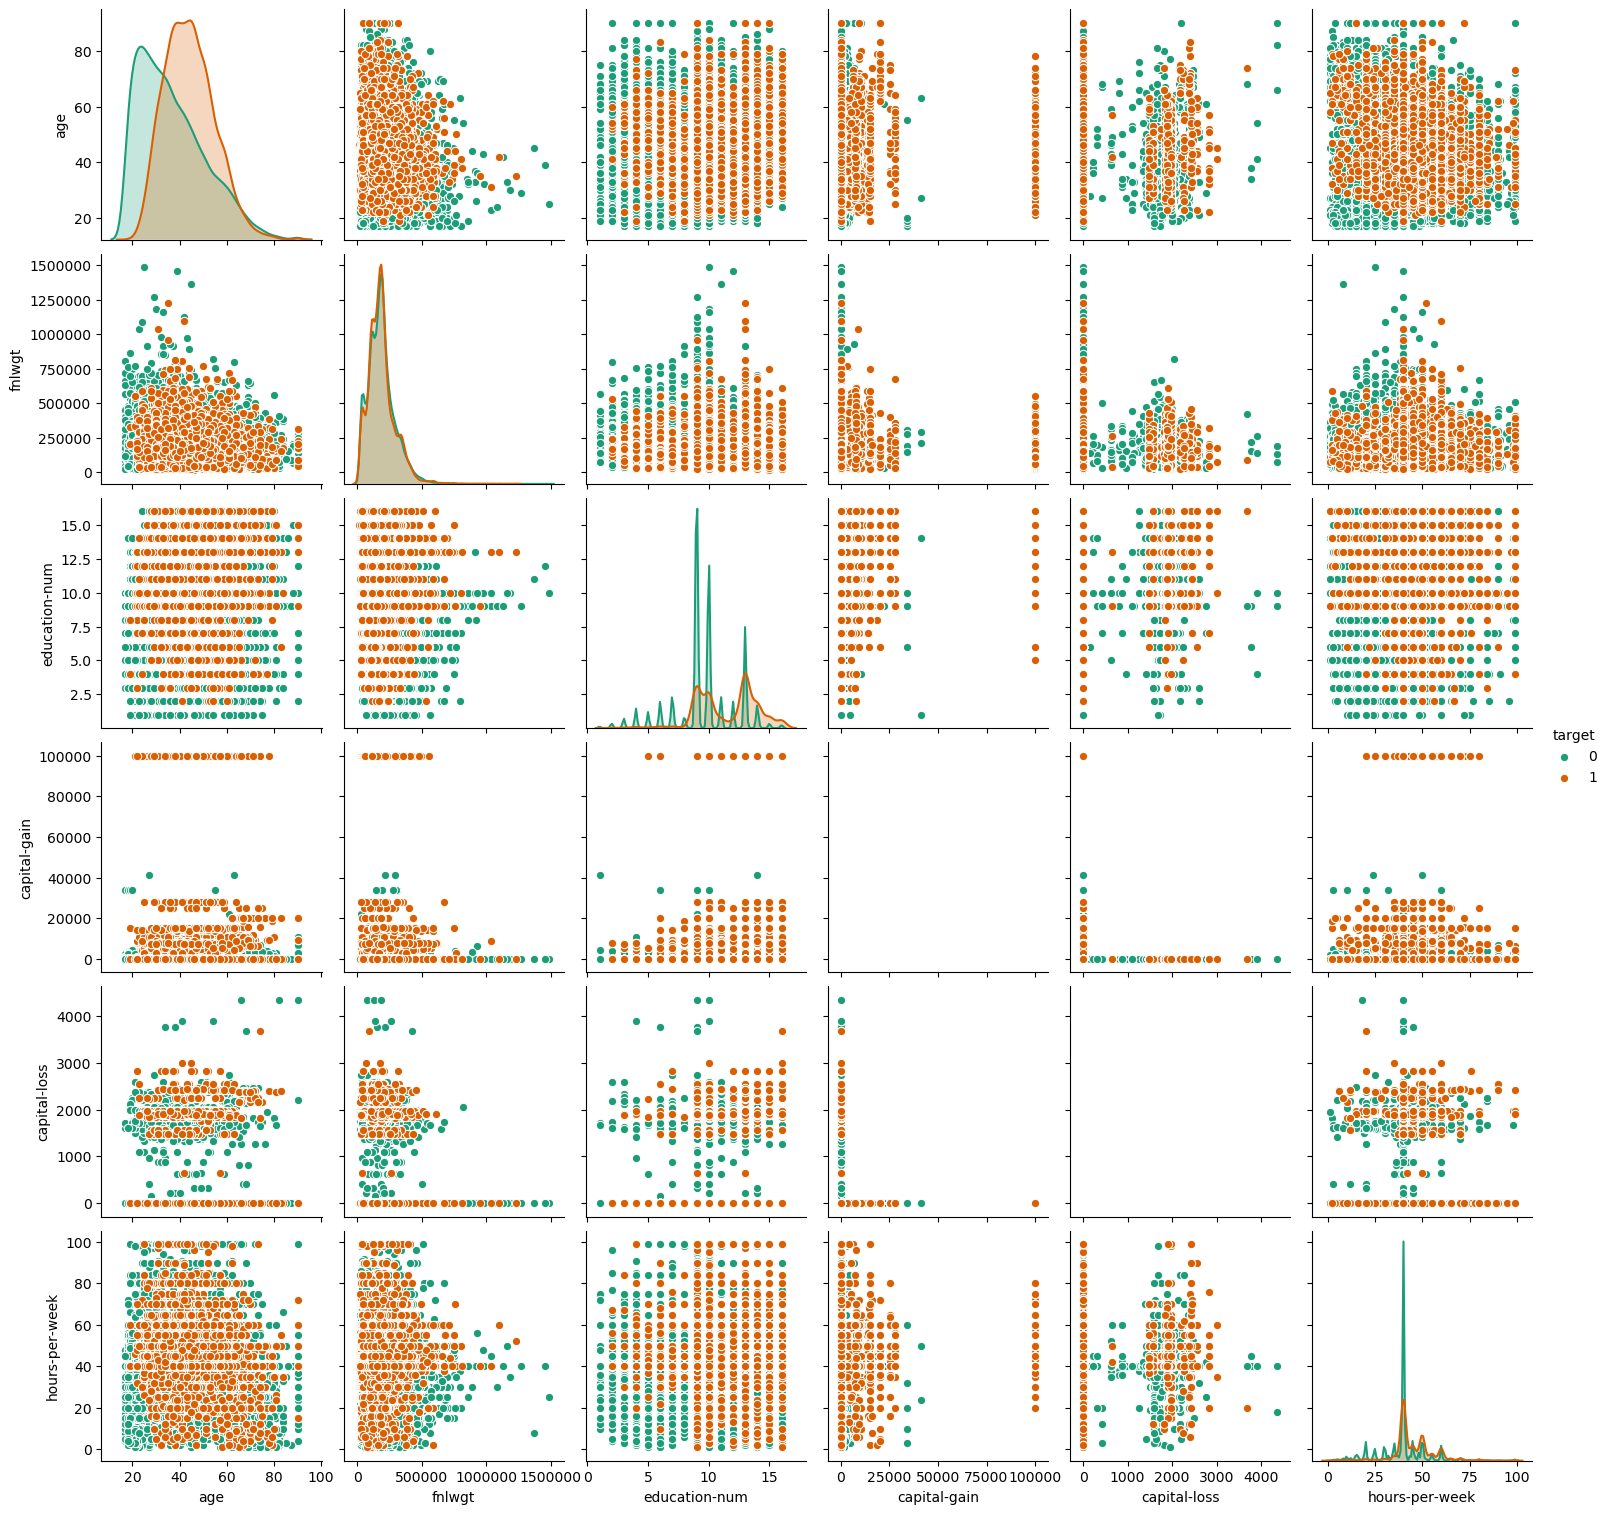

In [312]:
# Visualize corelations between the different features
plt.style.use('default')
plt.figure(figsize=(20, 17))
sns.pairplot(adult,hue='target',palette='Dark2');

In [28]:
corr_matrix = adult.corr()
corr_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
age,1.000000,-0.080289,0.043320,0.081259,0.064413,0.092548,0.240535
fnlwgt,-0.080289,1.000000,-0.044358,-0.002656,-0.005140,-0.022392,-0.010704
education-num,0.043320,-0.044358,1.000000,0.127236,0.078716,0.147713,0.336184
capital-gain,0.081259,-0.002656,0.127236,1.000000,-0.032251,0.079067,0.219704
capital-loss,0.064413,-0.005140,0.078716,-0.032251,1.000000,0.054275,0.148560
hours-per-week,0.092548,-0.022392,0.147713,0.079067,0.054275,1.000000,0.227138
target,0.240535,-0.010704,0.336184,0.219704,0.148560,0.227138,1.000000


**Visualizing the correlation matrix of Numerical Features**

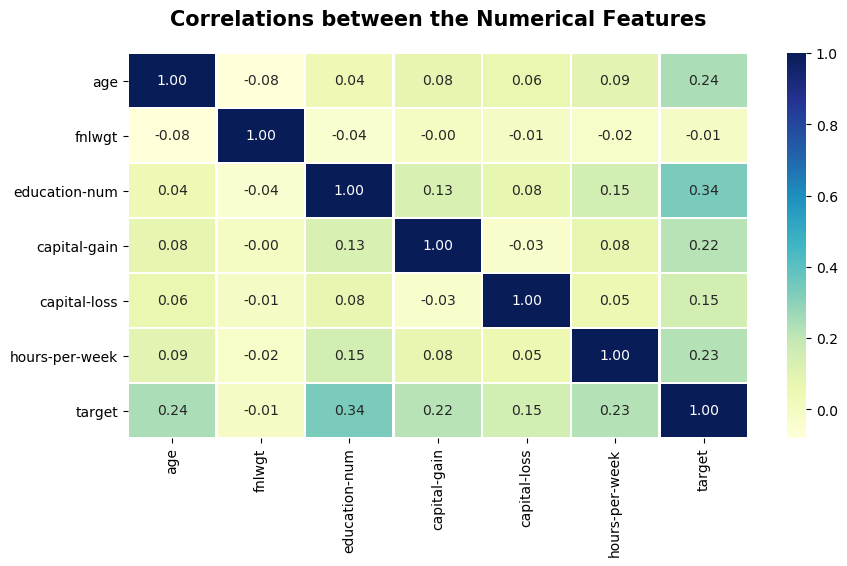

In [29]:
# Correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=1)
plt.title('Correlations between the Numerical Features', fontsize=15, fontweight='bold', pad=20);

>**hours-per-week, capital-gain, education-num, age seems to have the highest linear corelations to the target**

### 4.3 Experimenting with attribute comparisons

**Numerical attributes**

In [30]:
# Let us start by making a clean dataset from the test set
data_exp = data.copy()

In [31]:
# Making new features 'capital_loss_occured' and 'capital_gain_occured' will which measure wether the person gained capital or losees capital respectively 
data_exp['capital_loss_occured'] = data_exp.apply(lambda row: True if (row['capital-loss'] > 0) else False, axis=1 )
data_exp['capital_gain_occured'] = data_exp.apply(lambda row: True if (row['capital-gain'] > 0) else False, axis=1 )

Since, our target attribute has a nice corerelation with the education-num attribute so, let's check out the attribute and try to generate features if any.

In [32]:
data_exp['education-num'].describe()

count    26048.000000
mean        10.079661
std          2.583186
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [33]:
data_exp['education-num'].value_counts()

9     8381
10    5816
13    4259
14    1405
11    1108
7      931
12     876
6      729
4      526
15     462
5      408
8      354
16     329
3      282
2      140
1       42
Name: education-num, dtype: int64

In [35]:
# Create a new feature which measures the 'capital-loss' or 'capital-profit' per 'hours-per-week'
# if 'capital-loss' is 0 then 'loss_per_hour' will be 0
# if 'capital-gain' is 0 then 'progit_per_hour' will 0

data_exp['loss_per_hour'] = data_exp['capital-loss'] / data_exp['hours-per-week']
data_exp['profit_per_hour'] = data_exp['capital-gain'] / data_exp['hours-per-week']

**Categorical Attributes**

**We have seem that people from the United-States are higher and have higher number of people satisfying both the targets so in our given dataset so let us create a feature `'is_USA'` , which returns true in native-counrty is USA, so that we can differentiate better and also we will merge United-States and Outlying-US(Guam-USVI-etc) into a same USA category**

In [36]:
data_exp['native-country'].replace({' United-States': 'USA', ' Outlying-US(Guam-USVI-etc)':'USA'}, inplace=True)
data_exp['native-country'].unique()

array(['USA', nan, ' Poland', ' Germany', ' Trinadad&Tobago', ' Mexico',
       ' Columbia', ' Greece', ' Japan', ' France', ' Hungary', ' Taiwan',
       ' Dominican-Republic', ' El-Salvador', ' England', ' Cambodia',
       ' Portugal', ' Vietnam', ' Cuba', ' Philippines', ' Haiti',
       ' Scotland', ' Jamaica', ' Peru', ' Puerto-Rico', ' China',
       ' Ecuador', ' India', ' Canada', ' South', ' Guatemala',
       ' Thailand', ' Iran', ' Italy', ' Hong', ' Yugoslavia',
       ' Nicaragua', ' Ireland', ' Honduras', ' Holand-Netherlands',
       ' Laos'], dtype=object)

In [37]:
data_exp['is_USA'] = data_exp.apply(lambda row: True if (row['native-country'] == 'USA') else False, axis=1)
data_exp.head()

,age,workclass,fnlwgt,education,education-num,married-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target,capital_loss_occured,capital_gain_occured,education_num_per_age,loss_per_hour,profit_per_hour,is_USA
15738,32,Private,37210,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,USA,1,False,False,0.406250,0.0,0.000,True
27985,43,Private,101950,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,USA,0,False,False,0.325581,0.0,0.000,True
30673,20,NaN,122244,HS-grad,9,Never-married,NaN,Not-in-family,White,Female,0,0,28,USA,0,False,False,0.450000,0.0,0.000,True
9505,40,Local-gov,24763,Some-college,10,Divorced,Transport-moving,Unmarried,White,Male,6849,0,40,USA,0,False,True,0.250000,0.0,171.225,True
26417,24,Private,113936,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,USA,0,False,False,0.541667,0.0,0.000,True


In [38]:
# Corelation Matrix
data_exp_corr = data_exp.corr()
data_exp_corr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target,capital_loss_occured,capital_gain_occured,education_num_per_age,loss_per_hour,profit_per_hour,is_USA
age,1.000000,-0.080311,0.033716,0.077424,0.061073,0.062378,0.232499,0.053381,0.118349,-0.781554,0.057807,0.073321,0.017923
fnlwgt,-0.080311,1.000000,-0.043911,-0.002245,-0.006698,-0.017893,-0.011820,-0.004925,-0.008247,0.032680,-0.001636,0.000322,-0.071222
education-num,0.033716,-0.043911,1.000000,0.124952,0.079671,0.145552,0.334766,0.076411,0.115590,0.489945,0.054204,0.101426,0.106597
capital-gain,0.077424,-0.002245,0.124952,1.000000,-0.031587,0.078203,0.221642,-0.032254,0.484611,-0.010788,-0.024098,0.847228,0.000711
capital-loss,0.061073,-0.006698,0.079671,-0.031587,1.000000,0.055082,0.148850,0.979297,-0.065180,-0.018460,0.760649,-0.028948,0.007712
hours-per-week,0.062378,-0.017893,0.145552,0.078203,0.055082,1.000000,0.227731,0.051813,0.079739,-0.080063,-0.041119,0.012272,0.001129
target,0.232499,-0.011820,0.334766,0.221642,0.148850,0.227731,1.000000,0.137720,0.265794,-0.075364,0.091527,0.189699,0.031487
capital_loss_occured,0.053381,-0.004925,0.076411,-0.032254,0.979297,0.051813,0.137720,1.000000,-0.066557,-0.015024,0.747135,-0.029560,0.007088
capital_gain_occured,0.118349,-0.008247,0.115590,0.484611,-0.065180,0.079739,0.265794,-0.066557,1.000000,-0.049243,-0.049727,0.444126,0.011440
education_num_per_age,-0.781554,0.032680,0.489945,-0.010788,-0.018460,-0.080063,-0.075364,-0.015024,-0.049243,1.000000,-0.016554,-0.012745,0.066394


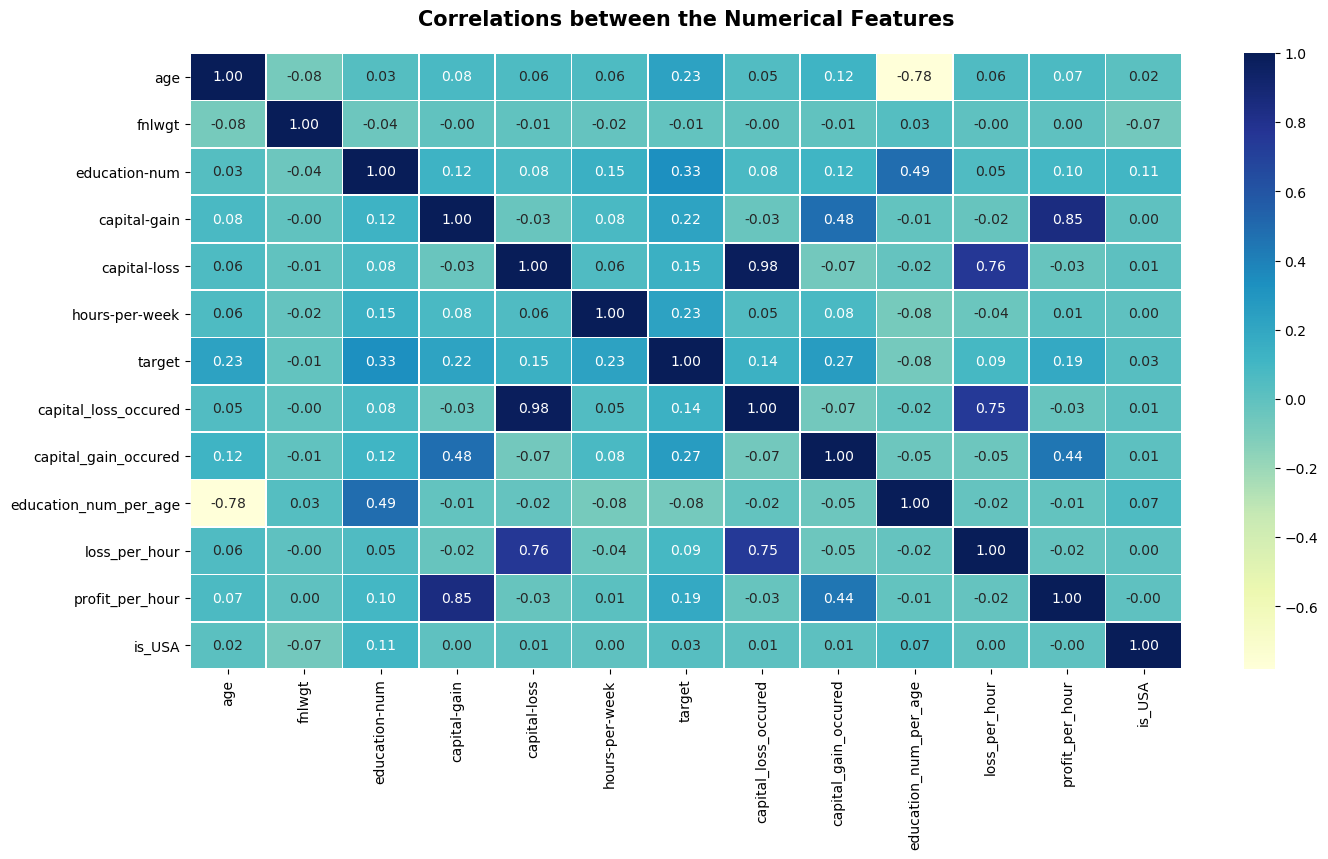

In [148]:
# Let's Visualize our Corelation Matrix 
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.heatmap(data_exp_corr, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlations between the Numerical Features', fontsize=15, fontweight='bold', pad=20);

## 5.  Prepare the Data for Machine Learning
**It will involve the following steps** :
* Data Cleaning
* Handling Text and Categorical Attributes
* Feature Scaling

To make our task easier and so that we don't have to repeat our setps we will create a function to process our data and call it whenever necessary

In [10]:
# Function to process our data

def process_data(data, random_split=False):
    """
    This function processes the data for machine learning.
    
    Assumptions : We have assumed that our dependent variable is 'target'.
    
    Parameters  : 1. data -- pandas dataframe
                  2. random_split -- train_test_split (defalut=False)
                 
    Returns     : 1. preprocessed train set :if random_split = True also returns test set
                  2. preprocessed train set :if random_split = True also returns test labels
                  
    """
    # Set up a random seed so that are results are re-producible
    np.random.seed(42)
    
    # Defining our preprocessed_labels
    preprocessed_labels = data['target'].values
    
    
    train_set = data.drop(columns='target')
    
    # Fill missing values in each column with the mode of each column
    for label, content in train_set.items():
        train_set[label] = train_set[label].fillna(train_set[label].mode()[0])
    
    # Add in the new features
    train_set['capital_loss_occured'] = train_set.apply(lambda row: True if (row['capital-loss'] > 0) else False, axis=1 )
    
    train_set['capital_gain_occured'] = train_set.apply(lambda row: True if (row['capital-gain'] > 0) else False, axis=1 ) 
    
    train_set['loss_per_hour'] = train_set['capital-loss'] / train_set['hours-per-week']
    
    train_set['profit_per_hour'] = train_set['capital-gain'] / train_set['hours-per-week']
    
    train_set['native-country'] = train_set['native-country'].replace({' United-States': 'USA', ' Outlying-US(Guam-USVI-etc)':'USA'})
    train_set['is_USA'] = train_set.apply(lambda row: True if (row['native-country'] == 'USA') else False, axis=1)
    
    
    # We will convert education column to ordered categories and then replace them with their categorical codes
    categories = [' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th',' HS-grad', 
            ' Prof-school',' Assoc-acdm', ' Assoc-voc', ' Some-college',' Bachelors',' Masters',' Doctorate']
    
    cat_dtype = pd.api.types.CategoricalDtype(categories= categories, ordered=True)
    train_set['education'] = train_set['education'].astype(cat_dtype).cat.codes
    
    
    # Convert the 'fnlwgt' to log(fnlwgt) to get a better distribution:
    train_set['fnlwgt'] = np.log(train_set['fnlwgt'])
    
    preprocessed_data = encode_scale(train_set)
        
    if random_split :
        preprocessed_train_set, preprocessed_val_set, preprocessed_train_labels, preprocessed_val_labels = train_test_split(preprocessed_data,
                                                                                                                           preprocessed_labels, 
                                                                                                                           test_size=0.2)
        return preprocessed_train_set, preprocessed_train_labels, preprocessed_val_set, preprocessed_val_labels
    else:
        return preprocessed_data, preprocessed_labels
        
    
# Function to encode and scale our data    
def encode_scale(train_set):
    """
    """
    # Let us One-Hot Encode our categorical data
    one_hot = OneHotEncoder()
    one_hot_columns = []
    
    for label, content in train_set.items():         
        if  pd.api.types.is_object_dtype(content):
            one_hot_columns.append(label)  # appends the names of labels which do not contain numeric values into a single list
    
    transformer = ColumnTransformer([('one_hot', one_hot, one_hot_columns)], remainder='passthrough')
    preprocessed_data = transformer.fit_transform(train_set).toarray()
    
    
    # We will now scale our data
    sc = StandardScaler()
    preprocessed_data = sc.fit_transform(preprocessed_data)
    
    return preprocessed_data
    

In [11]:
# Instantiate our test and test sets
X_train, y_train, X_test, y_test = process_data(data=data, random_split=True)

In [12]:
# Cross-check to check the dimensions our our train and dev sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((26048, 94), (26048,), (6513, 94), (6513,))

In [14]:
# Save our X_train, y_train, X_test and y_test
pickle.dump(X_train, open('datasets/X_train.pickle', 'wb'))
pickle.dump(X_test, open('datasets/X_test.pickle', 'wb'))
pickle.dump(y_train, open('datasets/y_train.pickle', 'wb'))
pickle.dump(y_test, open('datasets/y_test.pickle', 'wb'))

Now that we've got our data split into train and test sets. It's time to build our Machine Learning model.
* We will train it (find the patterns) on the training set.
* We will test it on (test the patterns) the test set

# 6. Modelling

We're going to try 6 different machine learning classifiers :
1. `LogisticRegression`


2. `K-NearestNeighbors`


3. `RandomForestClassifier`


4. `LinearSVC`


5. `SVC(kernel='rbf')`


6. `DecisionTreeClassifier`

**Let's us first train only on 2000 samples..........**

In [309]:
# No. of samples on which to train
n_samples = 2000

In [17]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    
    Parameters :    models: dict of different Scikit-Learn machine learning models
                    X_train : training data (no labels)
                    X_test : test data (no labels)
                    y_train : training labels
                    y_test : test_labels
                    
    Returns.   :    model_score : A dictionary contaning the scores of the models on the test set
    """
    # Setup random seed
    np.random.seed(42)
    
    # make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, models in models.items():
        # fit the models to the data
        models.fit(X_train[:n_samples], y_train[:n_samples])
        # evaluate the models and append its scores tp model scores
        model_scores[name] = models.score(X_test, y_test)
    return model_scores

In [190]:
# Put models in a dictionary
models = {
         'KNN': KNeighborsClassifier(),
         'Logistic Regression': LogisticRegression(),
         'LinearSVC': LinearSVC(),
         "SVC(kernel='rbf')": SVC(kernel='rbf'),
         'Decision Tree Classifier': DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier()
}

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/Users/ayushman/opt/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/svm/_base.py:974: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'KNN': 0.8089973898357132,
 'Logistic Regression': 0.8475356978350991,
 'LinearSVC': 0.8490710885920467,
 "SVC(kernel='rbf')": 0.8392445877475817,
 'Decision Tree Classifier': 0.810379241516966,
 'Random Forest': 0.8484569322892677}

In [191]:
model_scores_copy = model_scores

### 6.1 Model Comaprison

**Now that we've got a few baseline models let us compare their accuracy score**

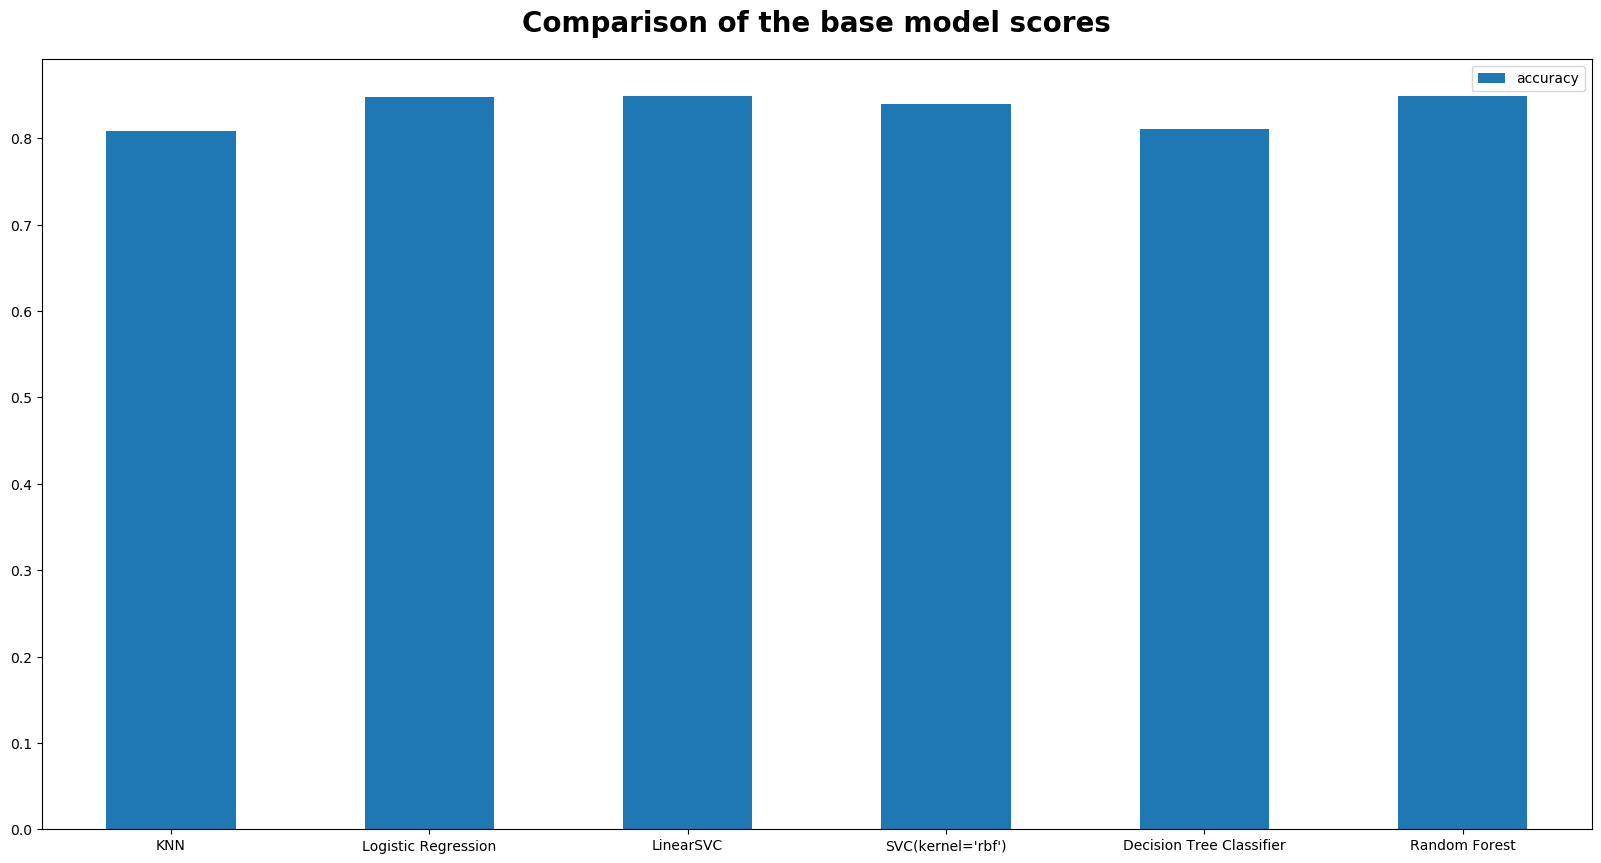

In [89]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot(kind='bar', rot=0, figsize=(20, 10));
plt.title('Comparison of the base model scores', fontsize=(20), pad=20, fontweight='bold');

Let us now look at the following :
  * HyperParameter tuning
  * Feature Importance
  * Cross-validation
  * Precision Recall
  * F1-score
  * Classification Report 
  * ROC curve
  * Area under the curve (AUC)

### 6.2 Hyperparameter Tuning

- **KNN tuning**

In [22]:
train_scores = []
test_scores = []

# Set up random seed
np.random.seed(42)

# Create a list of different values for no. of neighbors
neighbors = np.arange(1, 21)

# Instantiate our model
knn = KNeighborsClassifier(n_jobs=-1)

# Fit our model for each of the neighbors
for neighbor in neighbors:
    knn.set_params(n_neighbors = neighbor)
    knn.fit(X_train[:n_samples], y_train[:n_samples])
    
    # Update the training scores list
    train_scores.append(knn.score(X_train[:n_samples], y_train[:n_samples]))
    
    # Update the test scores tist
    test_scores.append(knn.score(X_test, y_test)) 

In [23]:
# Check out the training set score
train_scores

[1.0,
 0.8935,
 0.895,
 0.874,
 0.8805,
 0.869,
 0.8685,
 0.8645,
 0.861,
 0.856,
 0.8625,
 0.854,
 0.8565,
 0.8515,
 0.8535,
 0.8545,
 0.8535,
 0.8555,
 0.8525,
 0.847]

In [24]:
# Check out the test set scores
test_scores

[0.7833563641946876,
 0.801320436050975,
 0.8003992015968064,
 0.8071549209273761,
 0.8089973898357132,
 0.8154460310148933,
 0.8166743436204514,
 0.816981421771841,
 0.8203592814371258,
 0.8189774297558728,
 0.8205128205128205,
 0.8220482112697681,
 0.8238906801781053,
 0.8231229847996315,
 0.8217411331183786,
 0.8240442192538001,
 0.8237371411024106,
 0.8238906801781053,
 0.8269614616920006,
 0.8245048364808844]

Maximum KN score on the test data: 82.70%


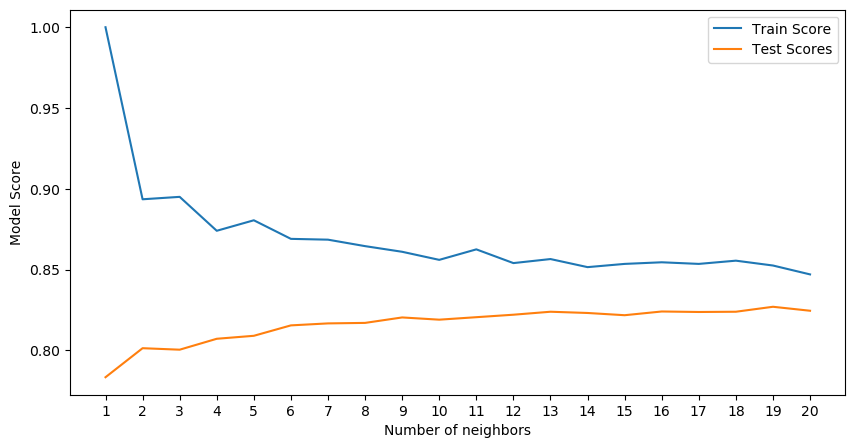

In [112]:
# Let's visualize our scores
plt.style.use('default')
plt.figure(figsize=(10, 5))
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Scores')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend();

print(f'Maximum KN score on the test data: {max(test_scores)*100:.2f}%')

In [196]:
# Create a new Dictionary to score our model scores after hypertuning
model_scores_after_tuning = {}
model_scores_after_tuning['KNN'] = max(test_scores)

### Hyperparameter tuning with RandomSearchCV
We're going to tune:

- LogisticRegression()
- RandomForestClassifier()
- DecisionTreeClassifier()
- SVC()

 * **Logistic Regression**

In [58]:
# Setup random seed
np.random.seed(42)
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver':['liblinear'],}

rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=2)

# Fit Random Hyperparamter Search model for LogisticRegression()
rs_log_reg.fit(X_train[:n_samples], y_train[:n_samples])

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... solver=liblinear, C=0.00026366508987303583, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... so

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......... solver=liblinear, C=0.004832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.004832930238571752 ........................
[CV] ......... solver=liblinear, C=0.004832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.004832930238571752 ........................
[CV] ......... solver=liblinear, C=0.004832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.012742749857031334 ........................
[CV] ......... solver=liblinear, C=0.012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.012742749857031334 ........................
[CV] ......... solver=liblinear, C=0.012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.012742749857031334 ........................
[CV] ......... solver=liblinear, C=0.012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.012742749857031334 ........................
[CV] ......... solver=liblinear, C=0.012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.012742749857031334 ........................
[CV] .

[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.2s
[CV] solver=liblinear, C=545.5594781168514 ...........................
[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.1s
[CV] solver=liblinear, C=545.5594781168514 ...........................
[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.1s
[CV] solver=liblinear, C=545.5594781168514 ...........................
[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.2s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.2s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.2s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.1s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.2s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [59]:
# Best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [197]:
log_reg_score = rs_log_reg.score(X_test, y_test)
log_reg_score

0.85014586212191

In [198]:
model_scores_after_tuning['Logistic Regression'] = log_reg_score

* **SVC**

In [104]:
# Setup random seed
np.random.seed(42)

# set up hyperparameter grid for SVC
param_grid = {'C': [0.1,1, 10, 100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'linear']}

rs_svc = RandomizedSearchCV(SVC(), param_distributions=param_grid, n_iter=100, cv=5, verbose=2, n_jobs=-1)

# Fit Random Hyperparameter search model fot SVC()
rs_svc.fit(X_train[:n_sample], y_train[:n_sample])

/Users/ayushman/opt/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   47.8s finished


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'linear']},
                   verbose=2)

In [105]:
rs_svc.best_params_

{'kernel': 'linear', 'gamma': 1, 'C': 100}

In [199]:
svc_scores = rs_svc.score(X_test, y_test)
svc_scores

0.85014586212191

In [200]:
# Add score to the dictionary
model_scores_after_tuning['SVC'] = svc_scores

* **Decision Tree Classifier**

In [118]:
param_grid = {
    'max_depth': [None, 3, 5, 10, 25],
    'min_samples_leaf' : [None, 1, 3, 5, 10, 25],
    'max_features' : [None, 1, 0.5, 'sqrt', 'log2']
}

rs_tree = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                             param_distributions=param_grid,
                             verbose=2,
                             cv=5,
                             n_iter=125,
                             n_jobs=-1)
rs_tree.fit(X_train[:n_samples], y_train[:n_samples])

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 562 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=125, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10, 25],
                                        'max_features': [None, 1, 0.5, 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [None, 1, 3, 5, 10,
                                                             25]},
                   verbose=2)

In [201]:
tree_score = rs_tree.score(X_test, y_test)
tree_score

0.8357131890066022

In [202]:
# Add Score to the dictionary
model_scores_after_tuning['Decision Tree Classifier'] = tree_score

* **Random Forest Classifier**

In [165]:
%%time
np.random.seed(42)
param_grid = {
    'n_estimators' :np.arange(10, 1000, 50),
    'bootstrap' : [True, False],
    'max_depth' : [None, 3, 5, 10, 25],
    'min_samples_leaf' : [1, 3, 5, 10, 25],
    'max_features' : [1, 0.5, 'sqrt', 'log2']
}

rs_random_forest = RandomizedSearchCV(RandomForestClassifier(),
                                      param_distributions=param_grid,
                                      cv=5,
                                      n_iter=200,
                                      n_jobs=-1, 
                                      verbose=2)
rs_random_forest.fit(X_train[:n_samples], y_train[:n_samples])

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.0min finished


CPU times: user 1.66 s, sys: 171 ms, total: 1.83 s
Wall time: 4min


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 5, 10, 25],
                                        'max_features': [1, 0.5, 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 10, 25],
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [166]:
rs_random_forest.score(X_train, y_train)

0.8555359336609336

In [203]:
rs_random_forest_scores = rs_random_forest.score(X_test, y_test)

In [204]:
model_scores_after_tuning['Random Forest Classifier'] = rs_random_forest_scores

In [206]:
model_scores_after_tuning

{'KNN': 0.8269614616920006,
 'Logistic Regression': 0.85014586212191,
 'SVC': 0.85014586212191,
 'Decision Tree Classifier': 0.8357131890066022,
 'Random Forest Classifier': 0.8539843390142792}

In [207]:
# Store our results in a dataframe
model_scores = pd.DataFrame(model_scores_copy, index=['accuracy'])
model_scores_after_tuning = pd.DataFrame(model_scores_after_tuning, index=['accuracy'])

In [311]:
# Let's create some functions to customize our plots
# Display labels above the plot
def display_labels(ax):
    """
    This Function Displays Labels above our bar chars
    Arguments  - ax : Current axis
    """
    for p in ax.patches:
            ax.annotate("%.4f" % p.get_height(),
                         (p.get_x() + p.get_width() / 2.,p.get_height()),
                          ha='center', va='center',
                          xytext=(0, 10),
                          textcoords='offset points')
# Hides the spines
def hide_spines(ax, pos=False):
    """
    This Function Hides the spine of our labels and ticks of our axes
    Arguments - ax : Current axis
                pos: List containing the position of which spine to hide 
                     (Default : hides all spines)
    """
    if not pos :
        pos = ['left', 'right', 'top', 'bottom']
    else:
        pos = pos
    
    for p in pos :
        ax.spines[p].set_visible(False)
    
    ax.tick_params(axis='x', which='both', bottom=False, top=False)
    ax.tick_params(axis='y', which='both', right=False, left=False, labelleft=False, labelright=False)

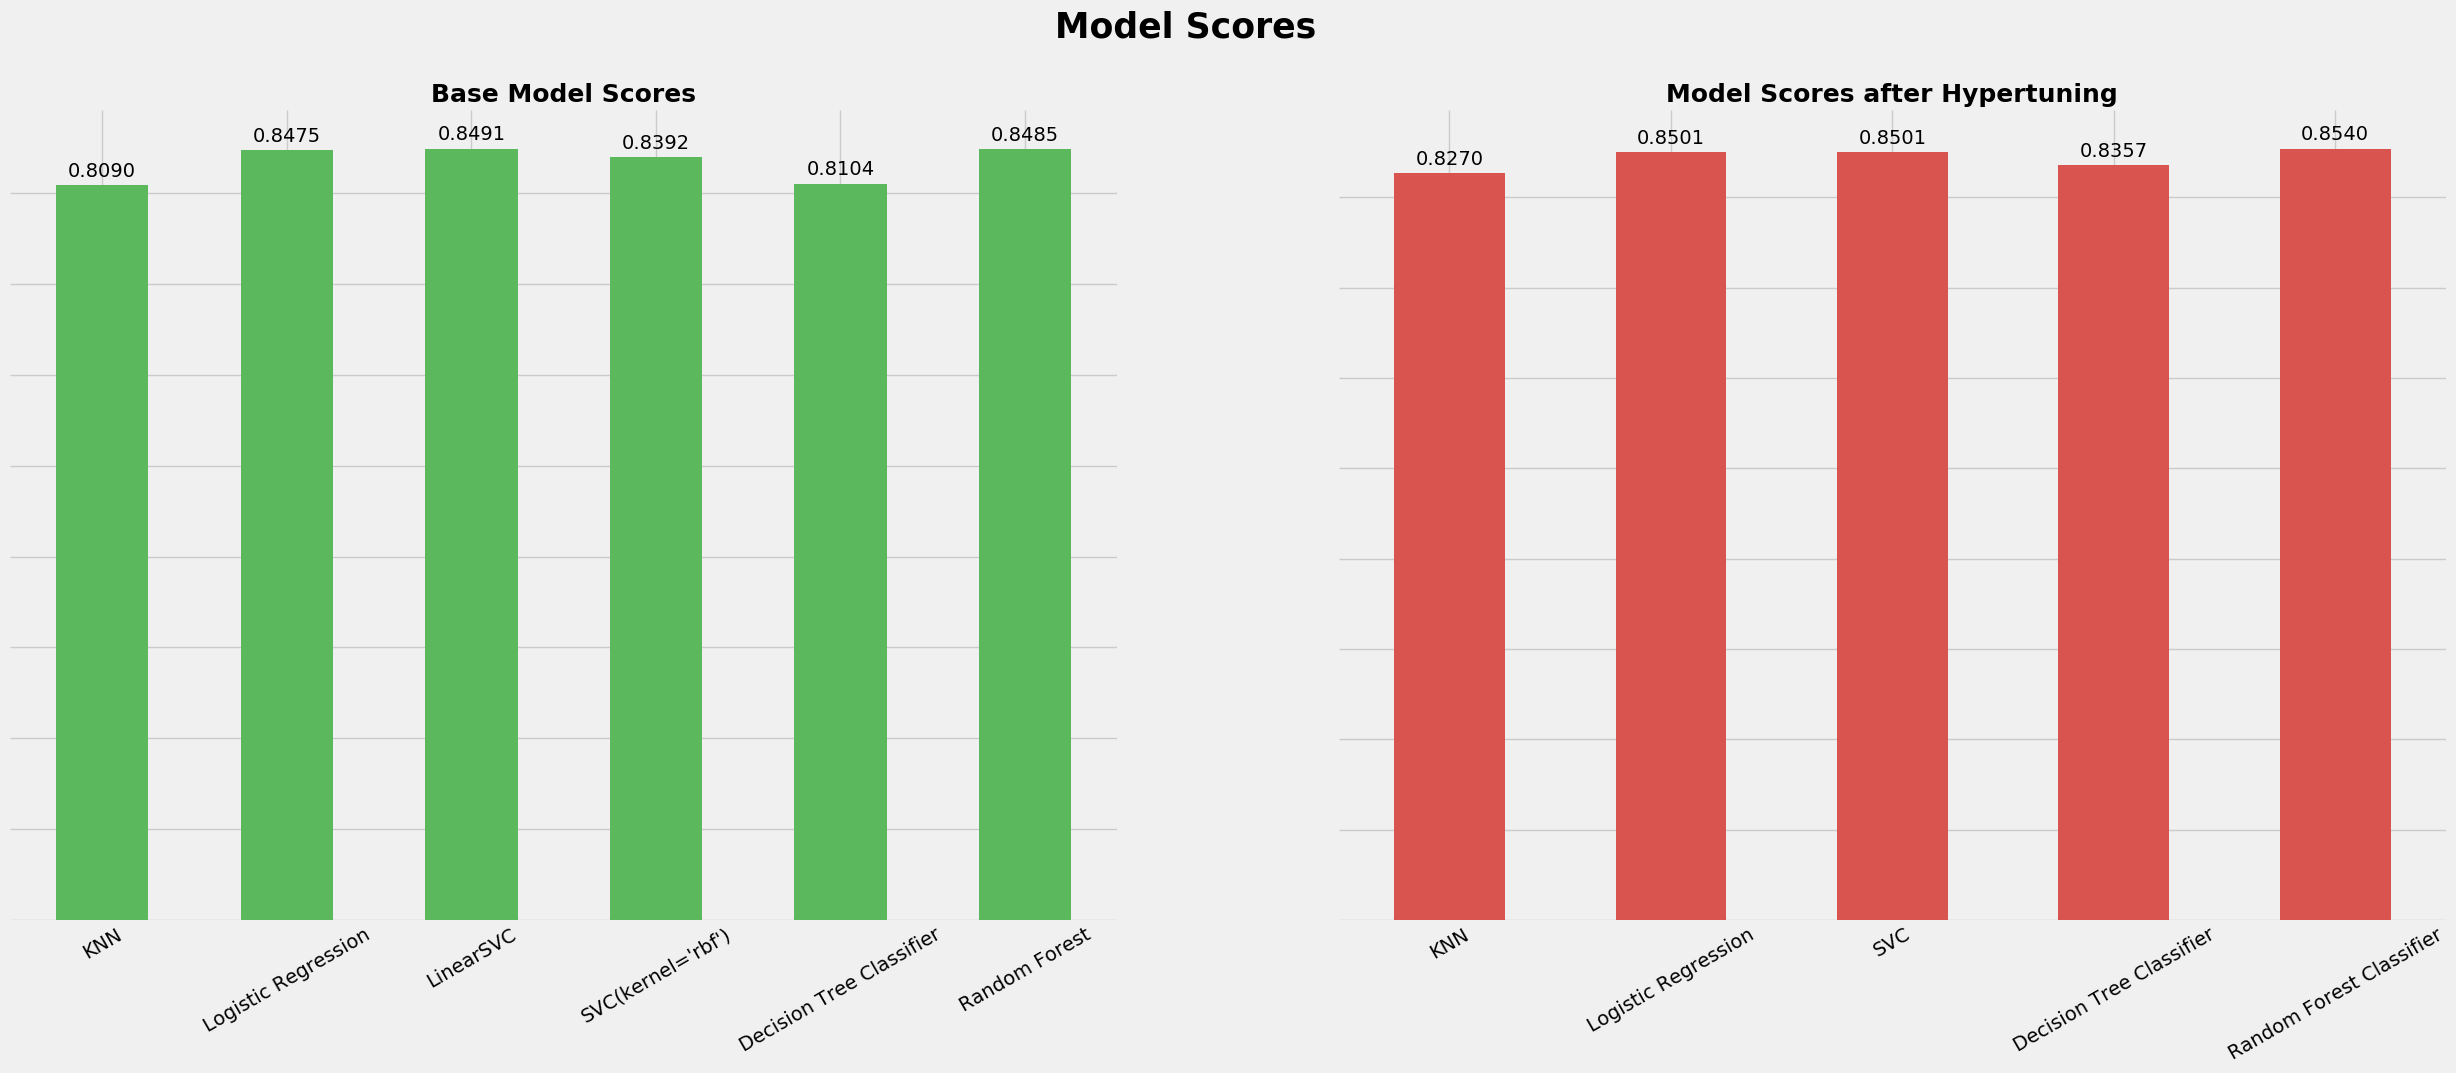

In [314]:
plt.style.use('fivethirtyeight')
# Let's start Plotting
fig, (ax1, ax2) = plt.subplots(figsize=(28, 10), nrows=1, ncols=2)

# Plot in ax1
model = model_scores.T.plot(kind='bar', ax=ax1, rot=30, color='#5cb85c')
model.set_title('Base Model Scores', fontsize=(18), fontweight='bold')
display_labels(ax1)
hide_spines(ax1)
ax1.get_legend().remove()

# Plot in ax2
model_new = model_scores_after_tuning.T.plot(kind='bar', ax=ax2, rot=30, color='#d9534f')
model_new.set_title('Model Scores after Hypertuning', fontsize=(18), fontweight='bold')
display_labels(ax2)
hide_spines(ax2)
ax2.get_legend().remove()

# Set Supertitle
fig.suptitle('Model Scores', fontsize=(25), fontweight='bold');

**Our models have improved let's us now try furthur improve our models using GridSearchCV , after which we will select the best model and train if on the whoel training set**

### Hyperparameter tuning using GridSearchCV

* **Decision Tree Classifier**

In [315]:
# Let us check our RandomSearCV params of our DecisionTreeClassifier
rs_tree.best_params_

{'min_samples_leaf': 10, 'max_features': 0.5, 'max_depth': 5}

In [339]:
# Let us create a parameter grid for GridSearchCV for DecisionTreeClassifer
np.random.seed(42)

param_grid = {
    'max_depth': [3, 5, 10, 25],
    'min_samples_leaf' : [3, 5, 10, 25],
    'max_features' : [0.5]
}

gs_tree = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid, cv=5, verbose=True)
gs_tree.fit(X_train[:n_samples], y_train[:n_samples])

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, 25], 'max_features': [0.5],
                         'min_samples_leaf': [3, 5, 10, 25]},
             verbose=True)

In [341]:
tree_grid_score = gs_tree.score(X_test, y_test)

In [348]:
# Compare the grid scores with the other scores
print('--------- Decision Tree Classifier ------------')
print('Base Model Score: ',model_scores['Decision Tree Classifier'][0])
print('RandomizedSearchCV Score :',model_scores_after_tuning['Decision Tree Classifier'][0])
print('GridSearchCV Score :',tree_grid_score)

--------- Decision Tree Classifier ------------
Base Model Score:  0.810379241516966
RandomizedSearchCV Score : 0.8357131890066022
GridSearchCV Score : 0.8355596499309074


* **RandomForestClassifier**

In [349]:
# Check the RandomizedSearhCV best parameters of RandomForestClassifier
rs_random_forest.best_params_

{'n_estimators': 110,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 25,
 'bootstrap': True}

In [355]:
%%time
param_grid = {
    'n_estimators' : [90, 80, 100, 110, 120, 130, 150],
    'min_samples_leaf' : [3, 5],
    'max_features': [0.5, 'sqrt'],
    'max_depth': [10, 25]
}

gs_random_forest = GridSearchCV(RandomForestClassifier(random_state=42),
                                param_grid=param_grid,
                                cv=5,
                                n_jobs=4,
                                verbose=2)
gs_random_forest.fit(X_train[:n_samples], y_train[:n_samples])

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   12.3s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   23.2s finished


CPU times: user 525 ms, sys: 54.2 ms, total: 579 ms
Wall time: 23.4 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'max_depth': [10, 25], 'max_features': [0.5, 'sqrt'],
                         'min_samples_leaf': [3, 5],
                         'n_estimators': [90, 80, 100, 110, 120, 130, 150]},
             verbose=2)

In [357]:
random_forest_grid_score = gs_random_forest.score(X_test, y_test)

In [368]:
# Compare the grid scores with the other scores
print('--------- Random Forest Classifier ------------')
print('Base Model Score: ',model_scores['Random Forest'][0])
print('RandomizedSearchCV Score :',model_scores_after_tuning['Random Forest Classifier'][0])
print('GridSearchCV Score :',random_forest_grid_score)

--------- Random Forest Classifier ------------
Base Model Score:  0.8484569322892677
RandomizedSearchCV Score : 0.8539843390142792
GridSearchCV Score : 0.8538307999385844


### **Training Models on the whole training set**

*We will select GridSearchCV(RandomForest), RandomizedSearCV(SVC), and RandomizedSearchCV(LogisticRegression)*

In [367]:
# Check out the best parameters
print('Logistic Regression: \t',rs_log_reg.best_params_)
print('SVC :\t',rs_svc.best_params_)
print('Random Forest: \t',gs_random_forest.best_params_)

Logistic Regression: 	 {'solver': 'liblinear', 'C': 206.913808111479}
SVC :	 {'kernel': 'linear', 'gamma': 1, 'C': 100}
Random Forest: 	 {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 100}


In [372]:
# Create Classifiers on the above parameters

# Instantiate Logistic Regression
log_reg_final = LogisticRegression(solver='liblinear', C=206.913808111479)

# Instantiate SVC
svc_final = SVC(kernel='linear', gamma=1, C=100)

# Instantiate Random Forest Classifier
random_forest_final = RandomForestClassifier(max_depth=25,
                                             max_features='sqrt',
                                             min_samples_leaf=5,
                                             n_estimators=100,
                                             n_jobs=3)

# Create a dictionary of the classifiers
classifier_final = {
    'Logistic Regression': log_reg_final,
    'SVC' : svc_final,
    'Random Forest Classifer' : random_forest_final
}
classifier_final

{'Logistic Regression': LogisticRegression(C=206.913808111479, solver='liblinear'),
 'SVC': SVC(C=100, gamma=1, kernel='linear'),
 'Random Forest Classifer': RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=5,
                        n_jobs=3)}

In [384]:
# Let us train our models
model_final_score = fit_and_score(classifier_final, X_train, X_test, y_train, y_test)

In [385]:
print(model_final_score)

{'Logistic Regression': 0.85014586212191, 'SVC': 0.85014586212191, 'Random Forest Classifer': 0.8541378780899739}


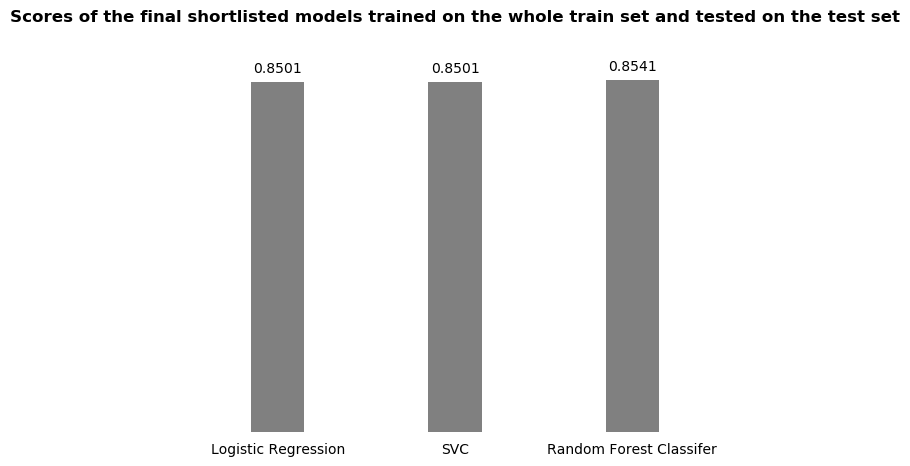

In [407]:
# Visualize our scores
model_final_score_df = pd.DataFrame(model_final_score, index=['accuracy']).T
plt.style.use('default')
fig, ax = plt.subplots(nrows=1, ncols=1)
model_final_score_df.plot(kind='bar', ax=ax, rot=0, color=['grey'],width=0.3)
display_labels(ax)
hide_spines(ax)
ax.get_legend().remove()
ax.set_title('Scores of the final shortlisted models trained on the whole train set and tested on the test set',
             pad=30, fontweight='bold');

**Our tuned Random Forest Classifier has achieved the highest accuray on the test set, let's now evaluate our tuned Random Forest Classifier, beyond accuracy**

## 6.3 Evaluating our tuned Machine Learning Classifer beyond Accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classifiaction Report
* Precision
* Recall
* F1-score


To evaluate our model first we need to make predictions

In [408]:
# Lets first save our tuned random forest classifier
pickle.dump(random_forest_final, open('random_forest_final.pickle', 'wb'))

In [409]:
# Load-in our saved model
classifier = pickle.load(open('random_forest_final.pickle','rb'))

In [411]:
classifier

RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=5,
                       n_jobs=3)

In [415]:
# We are now ready to make predictions
y_preds = classifier.predict(X_test)
# Predicted target
print(y_preds[:10])

[0 0 1 0 0 1 1 0 0 0]


In [416]:
# original target
print(y_test[:10])

[0 0 1 0 0 1 1 0 0 1]


* **Plot ROC curve and calculate AUC matrix**

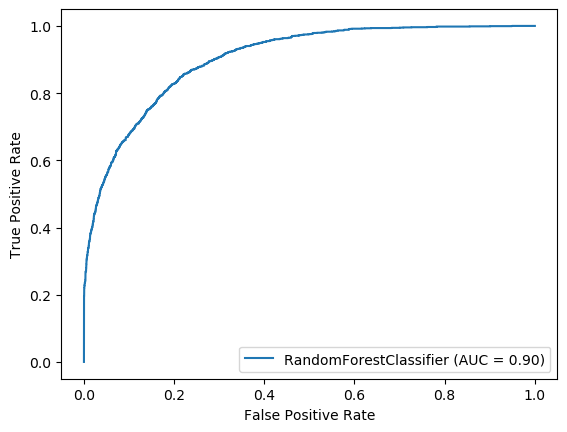

In [418]:
plot_roc_curve(classifier, X_test, y_test);

* **Confusion Matrix**

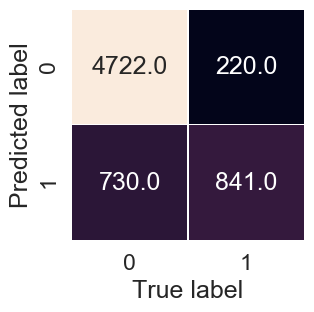

In [424]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    A nice looking confusion matrix using sns heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     cbar=False,
                     annot=True, fmt='.1f', linewidths=0.3)
    
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
plot_conf_mat(y_test, y_preds)

Now we've got a roc curve , an AUC metric and a confusion metric, let's get a classification report as well as a cross-validated precision , recall and fi-score

In [425]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4942
           1       0.79      0.54      0.64      1571

    accuracy                           0.85      6513
   macro avg       0.83      0.75      0.77      6513
weighted avg       0.85      0.85      0.84      6513



**precision: models predicts class one which are actually class one**

**recall: proportion of actual positives which were correctly classified**

### 6.4 Calculate Evaluation Metrics using Cross-Validation

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score`

In [433]:
# Let us create the data for cross validation
X, y = process_data(data=data, random_split=False)

# Cross validated accuracy
cv_acc = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
cv_acc = cv_acc.mean()

cv_acc

0.8621051225841645

In [435]:
# Cross validated precision
cv_precision = cross_val_score(classifier,X, y, cv=5, scoring='precision')
cv_precision = cv_precision.mean()
cv_precision

0.78838719646368

In [436]:
# Cross validated recall
cv_recall = cross_val_score(classifier, X, y, cv=5, scoring='recall')
cv_recall = cv_recall.mean()
cv_recall

0.5846218506523069

In [438]:
# cross validated f1-score
cv_f1_score = cross_val_score(classifier, X, y, cv=5, scoring='f1')
cv_f1 = cv_f1_score.mean()
cv_f1

0.6739413211815422

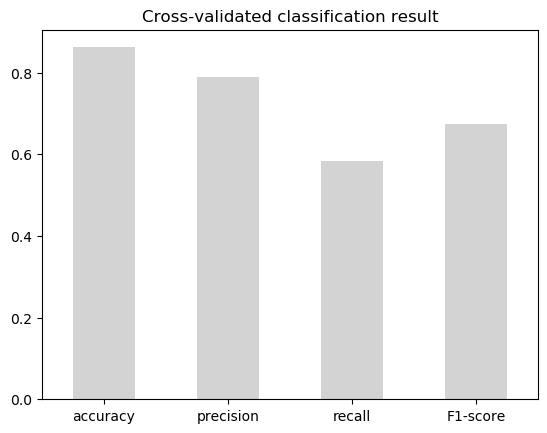

In [443]:
plt.style.use('default')
cv_metrics = pd.DataFrame({'accuracy': cv_acc,
                           'precision': cv_precision,
                           'recall': cv_recall,
                           'F1-score': cv_f1}, index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification result',
                       color='lightgrey',
                       rot = 0,
                       legend=False);

### 6.5 Feature Importance

Feature importance is another as asking, 'which features contributed most to the outcomes of the model and how did they contribute?'

Finding feature importance is different for each machine learning model.

Let's find the feature importance for our RandomForestClassifier model....

In [474]:
def feature_importance_data(train_set):
    """
    Function processes our data for feature_importance and keep our columnms names intact
    """
    train_set['capital_loss_occured'] = train_set.apply(lambda row: True if (row['capital-loss'] > 0) else False, axis=1 )
    train_set['capital_gain_occured'] = train_set.apply(lambda row: True if (row['capital-gain'] > 0) else False, axis=1 )
    train_set['loss_per_hour'] = train_set['capital-loss'] / train_set['hours-per-week']
    train_set['profit_per_hour'] = train_set['capital-gain'] / train_set['hours-per-week']
    train_set['native-country'] = train_set['native-country'].replace({' United-States': 'USA', ' Outlying-US(Guam-USVI-etc)':'USA'})
    train_set['is_USA'] = train_set.apply(lambda row: True if (row['native-country'] == 'USA') else False, axis=1)
    # We will convert education column to ordered categories and then replace them with their categorical codes
    categories = [' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th',' HS-grad', 
                ' Prof-school',' Assoc-acdm', ' Assoc-voc', ' Some-college',' Bachelors',' Masters',' Doctorate']
    cat_dtype = pd.api.types.CategoricalDtype(categories= categories, ordered=True)
    train_set['education'] = train_set['education'].astype(cat_dtype).cat.codes
    # Convert the 'fnlwgt' to log(fnlwgt) to get a better distribution:
    train_set['fnlwgt'] = np.log(train_set['fnlwgt'])
    for label, content in train_set.items():
        if not pd.api.types.is_numeric_dtype(content):
            train_set[label] = pd.Categorical(content).codes + 1
    return train_set

In [479]:
# Get our data ready and fit our model
data = feature_importance_data(data)
list_columns = data.columns.values.tolist()
list_columns.remove('target')
list_columns.append('target')
data = data[list_columns]

In [480]:
X = data.drop('target', axis=1)
y = data['target']
classifier.fit(X, y);

In [481]:
classifier.feature_importances_

array([0.0993649 , 0.01875627, 0.05559841, 0.07047308, 0.11080941,
       0.09824676, 0.04087449, 0.16579455, 0.00522079, 0.01466662,
       0.11625602, 0.03299565, 0.05583283, 0.00625737, 0.00539649,
       0.01238268, 0.01380189, 0.0750177 , 0.00225409])

In [482]:
data.head()

,age,workclass,fnlwgt,education,education-num,married-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,capital_loss_occured,capital_gain_occured,loss_per_hour,profit_per_hour,is_USA,target
0,39,7,11.258240,13,13,5,1,2,5,2,2174,0,40,40,False,True,0.0,54.35,True,0
1,50,6,11.330336,13,13,3,4,1,5,2,0,0,13,40,False,False,0.0,0.00,True,0
2,38,4,12.281393,8,9,1,6,2,5,2,0,0,40,40,False,False,0.0,0.00,True,0
3,53,4,12.366153,6,7,3,6,1,3,2,0,0,40,40,False,False,0.0,0.00,True,0
4,28,4,12.732011,13,13,3,10,6,3,1,0,0,40,5,False,False,0.0,0.00,False,0


In [508]:
# Match feature_importance to columns
feature_dict = dict(zip(data.columns.to_list(), classifier.feature_importances_.tolist()))
feature_dict

{'age': 0.09936489985622207,
 'workclass': 0.01875626850911574,
 'fnlwgt': 0.0555984071788818,
 'education': 0.07047308437768536,
 'education-num': 0.1108094059646878,
 'married-status': 0.09824675989835202,
 'occupation': 0.040874489645349635,
 'relationship': 0.1657945450455609,
 'race': 0.005220787800756315,
 'sex': 0.014666618121864176,
 'capital-gain': 0.11625602218513445,
 'capital-loss': 0.03299565402793666,
 'hours-per-week': 0.05583283413627723,
 'native-country': 0.006257370268663646,
 'capital_loss_occured': 0.005396493883006642,
 'capital_gain_occured': 0.012382683340747477,
 'loss_per_hour': 0.013801887432130264,
 'profit_per_hour': 0.07501770131715546,
 'is_USA': 0.0022540870104722764}

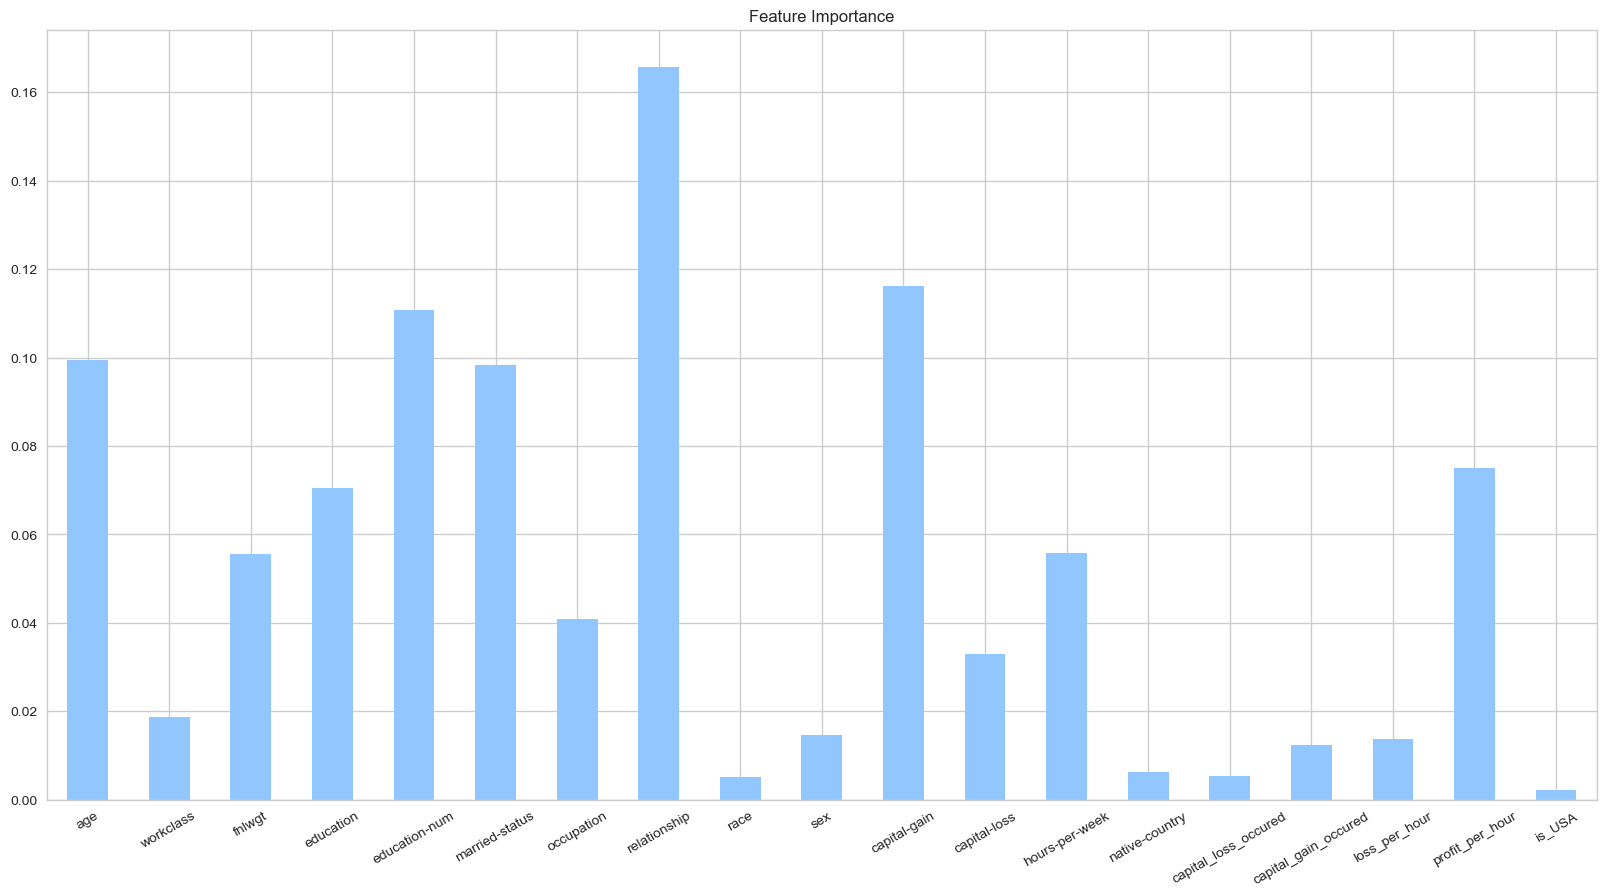

In [506]:
# Visualize feature importance
plt.style.use('seaborn-pastel')
feature_dt = pd.DataFrame(feature_dict, index=[0])
feature_dt.T.plot.bar(title='Feature Importance', legend=False, rot=30, figsize=(20, 10));

# 7. Experimentation

We havent't met our evaluation metric yet........

Also our F1-Scores are low ......

* Could we try a better model ? XGBoost, CatBoost, Artificial Neural Network ?
* Could we try VotingClassifier ?
* Could we go back and try to improve our existing features or generate more features?